# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset using pandas and creating a copy

In [2]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')
data=raw_data.copy()
data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


# Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
 3   view    100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [4]:
data.isna().sum()

price    0
size     0
year     0
view     0
dtype: int64

In [5]:
data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


# Creating a dummy variable to take of the categorical data

In [6]:
d=pd.get_dummies(data['view'])
d=pd.concat([data,d],axis=1)
d.drop(['view','No sea view'],inplace=True,axis=1)
d['price']=d['price'].astype(int)
d.head()

,price,size,year,Sea view
0,234314,643.09,2015,0
1,228581,656.22,2009,0
2,281626,487.29,2018,1
3,401255,1504.75,2015,0
4,458674,1275.46,2009,1


<AxesSubplot:xlabel='Sea view', ylabel='count'>

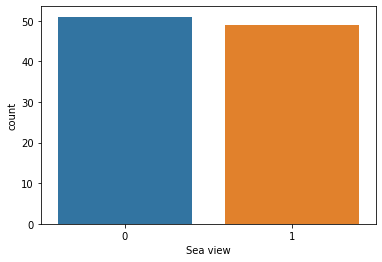

In [7]:
sns.countplot(d['Sea view'])

<AxesSubplot:xlabel='year', ylabel='count'>

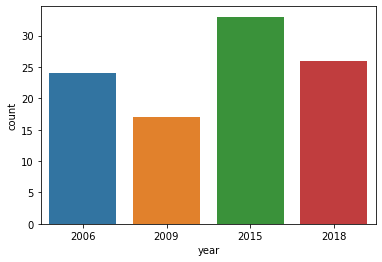

In [8]:
sns.countplot(d['year'])

1842.51

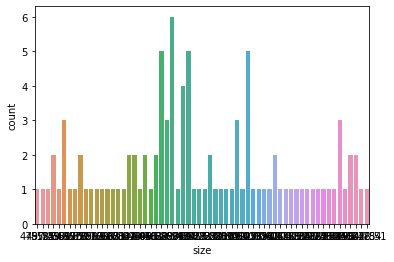

In [9]:
sns.countplot(d['size'])
plt.rcParams['figure.figsize']=(5,5)
d['size'].values.max()

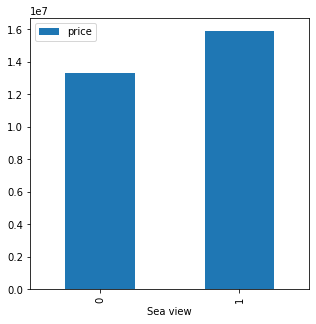

In [10]:
price_plot=d.pivot_table(index='Sea view',values='price',aggfunc=np.sum)
price_plot.plot(kind='bar')
plt.show()

# Feature scaling

In [11]:
scaler=StandardScaler()
scaler.fit(d[['size','year','price']])

StandardScaler()

In [12]:
scaled_inputs=scaler.transform(d[['size','year','price']])

# Concatenating dataframe d and new

In [13]:

new=pd.DataFrame(scaled_inputs)
new.columns=['size','year','price']
d=d.drop('size',axis=1)
d=d.drop('year',axis=1)
d=d.drop('price',axis=1)
new
new=pd.concat([d,new],axis=1)
new

,Sea view,size,year,price
0,0,-0.708164,0.510061,-0.756208
1,0,-0.663873,-0.765092,-0.830988
2,1,-1.233719,1.147638,-0.139085
3,0,2.198445,0.510061,1.421317
4,1,1.424989,-0.765092,2.170273
...,...,...,...,...
95,1,-1.022856,-0.765092,-0.519517
96,0,0.622084,-0.765092,0.237825
97,0,2.198445,-1.402669,1.191488
98,0,-0.690623,0.510061,-0.875806


# Making the features discrete rather than continuous

In [14]:
new['price']=new['price'].astype(int)
new['year']=new['year'].astype(int)
new['size']=new['size'].astype(int)

# Declaring our dependent and independent variable

In [15]:
x=new[['size','Sea view','year']]
y=new['price']

# Split into training and testing

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
ml=DecisionTreeClassifier(ccp_alpha=0.001)
ml.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001)

In [18]:
ml.score(x_train,y_train)

0.875

# Testing the model

In [19]:
y_predict=ml.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          -1       0.50      0.75      0.60         4
           0       0.83      0.77      0.80        13
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         1

    accuracy                           0.70        20
   macro avg       0.46      0.50      0.47        20
weighted avg       0.69      0.70      0.69        20



In [20]:
y_predict=ml.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7

# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
PREDICT=pd.DataFrame(confusion_matrix(y_test, y_predict))
PREDICT.columns=['Predicted 0','Predicted 1','Predicted 2','Predicted 3']
PREDICT=PREDICT.rename(index={0:'Actual 0',1:'Actual 1',2:'Actual 2',3:'Actual 3'})
PREDICT

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,3,1,0,0
Actual 1,3,10,0,0
Actual 2,0,1,1,0
Actual 3,0,0,1,0


# Support Vector Classifier

In [22]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [23]:
svc.score(x_train,y_train)

0.8625

In [24]:
y_predict_3=svc.predict(x_test)
accuracy_score(y_test,y_predict_3)

0.65

# Logistic Regression

In [25]:
from sklearn import metrics
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=reg.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6